In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

from dueling_agent import *

In [2]:
env = gym.make('Enduro-v0')
print(env.observation_space)
print(env.action_space)

action_dim = env.action_space.n
agent = Agent(action_dim)

Box(210, 160, 3)
Discrete(9)


In [10]:
k = 4
sum_rewards = 0
# get initial state
frame_list = deque(maxlen = k)
frame_list.append(env.reset())
for _ in range(k-1):
    action = env.action_space.sample() 
    frame, reward, done, _ = env.step(action)
    sum_rewards += reward
    frame_list.append(frame)
state = preprocess_frames(frame_list)    

while True:
    action = agent.act(state)
    frame, reward, done, _ = env.step(action)
    sum_rewards += reward
    frame_list.append(frame)
    next_state = preprocess_frames(frame_list)    
    #agent.step(state, action, reward, next_state, done)
    state = next_state
    sum_rewards += reward
    if done:
        break

In [ ]:


sum_rewards = 0
count = 0
while True:
    action = agent.act(state, 1.)
    reward, next_state, done = collect_tuple(env,action)
    agent.step(state, action, reward, next_state, done)
    state = next_state
    sum_rewards += reward
    print("\r learn {}...update {}".format(agent.t_step,agent.target_updates),end="")
    count+=1
    if done:
        break
count

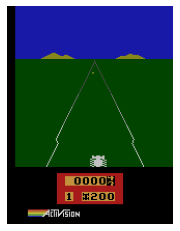

In [3]:
img = plt.imshow(env.render(mode='rgb_array'))
state = env.reset()
sum_rewards = 0
for _ in range(100):
    action = env.action_space.sample() 
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    plt.imshow(state)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    next_state, reward, done, _ = env.step(action)
    sum_rewards += reward
    if done:
        break 
    state = next_state

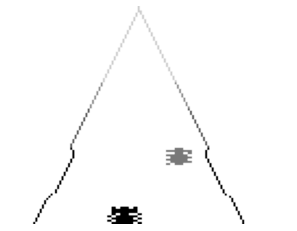

In [3]:
state = env.reset()
sum_rewards = 0
for _ in range(80):
    frame = preprocess_frames([state])[0]
    action = env.action_space.sample() 
    plt.axis('off')
    plt.imshow(frame, cmap='Greys')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    next_state, reward, done, _ = env.step(action)
    sum_rewards += reward
    if done:
        break 
    state = next_state

(1, 100, 130)


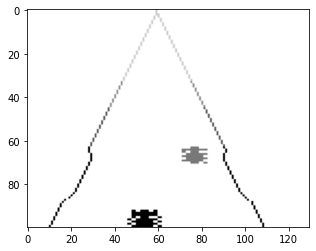

In [4]:
frame = preprocess_frames([state])
print(frame.shape)
plt.imshow(frame[0], cmap='Greys')
plt.show()

In [3]:
env.reset()
action = env.action_space.sample() 
_, state, _ = collect_tuple(env,action)

sum_rewards = 0
count = 0
while True:
    action = agent.act(state, 1.)
    reward, next_state, done = collect_tuple(env,action)
    agent.step(state, action, reward, next_state, done)
    state = next_state
    sum_rewards += reward
    print("\r learn {}...update {}".format(agent.t_step,agent.target_updates),end="")
    count+=1
    if done:
        break
count

 learn 1040...update 208

1104

In [4]:
4172/5

834.4

In [5]:
state_tensor = torch.from_numpy(state).float().unsqueeze(0)

In [11]:
next_action = agent.target_net(state_tensor).max(1)[1].unsqueeze(1)

In [12]:
next_action

tensor([[0]])

In [13]:
agent.target_net(state_tensor ).gather(1, next_action)

tensor([[0.0101]], grad_fn=<GatherBackward>)